In [6]:
import os
import pandas as pd
from tqdm import tqdm

In [2]:
DATASET_PATH = '../data/3_final_data/'
SMILES_COLUMN = 'smiles'
VALUE_COLUMN = 'logP'

In [3]:
dataset = pd.read_csv(os.path.join(DATASET_PATH, 'logp_wo_averaging.csv'))

In [4]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem


In [5]:
from rdkit.Chem import Descriptors

In [11]:
def features_calculation(df):

    
    tpsa = [Descriptors.TPSA(Chem.MolFromSmiles(smiles))for smiles in tqdm(dataset[SMILES_COLUMN])]
    mv = []
    bad_smiles = []
    for smiles in tqdm(dataset[SMILES_COLUMN]):
        mol = Chem.AddHs(Chem.MolFromSmiles(smiles))
        AllChem.EmbedMolecule(mol)
        try:
            mv.append(AllChem.ComputeMolVolume(mol))
        except ValueError:
            mv.append(0.0)
            bad_smiles.append(smiles)
    
    df['TPSA'] = tpsa
    df['MV'] = mv
    return df, bad_smiles

In [12]:
dataset, bad_smiles = features_calculation(dataset)


100%|██████████| 13777/13777 [00:02<00:00, 6122.46it/s]

  1%|▏         | 174/13777 [00:23<1:29:11,  2.54it/s]


  3%|▎         | 398/13777 [00:50<39:51,  5.59it/s]


  4%|▍         | 599/13777 [01:15<19:39, 11.17it/s]


  6%|▌         | 789/13777 [01:44<53:56,  4.01it/s]


  7%|▋         | 1020/13777 [02:09<33:09,  6.41it/s]


  9%|▊         | 1193/13777 [02:45<29:53,  7.01it/s]


 10%|█         | 1392/13777 [03:09<29:38,  6.97it/s]


 11%|█         | 1489/13777 [03:25<1:03:02,  3.25it/s]RDKit ERROR: [00:00:37] UFFTYPER: Unrecognized charge state for atom: 20

 11%|█▏        | 1564/13777 [03:36<28:45,  7.08it/s]


 13%|█▎        | 1726/13777 [04:05<51:10,  3.93it/s]  


 14%|█▎        | 1894/13777 [04:32<27:29,  7.21it/s]


 15%|█▍        | 2066/13777 [04:57<1:00:38,  3.22it/s]


 16%|█▋        | 2253/13777 [05:25<35:37,  5.39it/s]


 18%|█▊        | 2443/13777 [05:54<27:22,  6.90it/s]


 19%|█▉        | 2625/13777 [06:31<31:23,  5.92it/s]


 20%|█▉        | 2687/13777 [06:42<35:03,  5.27it/s]RDKit ERROR: [00:03:54] UFFTYPER: Unrecognized atom type: Ca1 (12)

 20%|██        | 2791/13777 [07:02<47:33,  3.85it/s]


 21%|██▏       | 2959/13777 [07:28<21:41,  8.31it/s]


 23%|██▎       | 3119/13777 [08:05<21:54,  8.11it/s]


 24%|██▍       | 3292/13777 [08:40<37:00,  4.72it/s]


 25%|██▍       | 3418/13777 [09:01<38:19,  4.50it/s]RDKit WARNING: [00:06:13] UFFTYPER: Warning: hybridization set to SP3 for atom 14

 25%|██▌       | 3447/13777 [09:07<29:00,  5.93it/s]


 26%|██▌       | 3607/13777 [09:33<25:47,  6.57it/s]


 27%|██▋       | 3776/13777 [09:59<27:13,  6.12it/s]


 29%|██▊       | 3944/13777 [10:24<28:20,  5.78it/s]


 30%|██▉       | 4132/13777 [10:48<18:45,  8.57it/s]


 31%|███▏      | 4311/13777 [11:12<24:49,  6.35it/s]


 32%|███▏      | 4477/13777 [11:43<19:20,  8.01it/s]


 34%|███▎      | 4649/13777 [12:06<21:10,  7.18it/s]


 35%|███▍      | 4811/13777 [12:32<25:05,  5.96it/s]


 36%|███▌      | 4988/13777 [12:59<21:35,  6.78it/s]


 37%|███▋      | 5053/13777 [13:07<15:53,  9.15it/s]RDKit ERROR: [00:10:19] UFFTYPER: Unrecognized charge state for atom: 3

 37%|███▋      | 5054/13777 [13:08<15:47,  9.20it/s]RDKit ERROR: [00:10:19] UFFTYPER: Unrecognized charge state for atom: 3

 37%|███▋      | 5055/13777 [13:08<15:31,  9.36it/s]RDKit ERROR: [00:10:19] UFFTYPER: Unrecognized charge state for atom: 3

 37%|███▋      | 5147/13777 [13:22<20:36,  6.98it/s]


 39%|███▉      | 5347/13777 [13:48<17:22,  8.08it/s]


 40%|████      | 5547/13777 [14:12<17:56,  7.65it/s]


 41%|████      | 5628/13777 [14:22<12:31, 10.85it/s]RDKit ERROR: [00:11:34] UFFTYPER: Unrecognized atom type: Fe5 (6)

 41%|████▏     | 5714/13777 [14:34<20:17,  6.62it/s]


 43%|████▎     | 5910/13777 [15:00<18:55,  6.93it/s]


 44%|████▍     | 6089/13777 [15:24<14:30,  8.83it/s]


 45%|████▌     | 6266/13777 [15:46<14:26,  8.67it/s]


 47%|████▋     | 6468/13777 [16:09<17:15,  7.06it/s]


 48%|████▊     | 6654/13777 [16:34<18:34,  6.39it/s]


 50%|████▉     | 6854/13777 [17:09<17:51,  6.46it/s]


 51%|█████     | 7044/13777 [17:35<12:21,  9.08it/s]


 52%|█████▏    | 7219/13777 [18:01<16:39,  6.56it/s]


 54%|█████▎    | 7380/13777 [18:29<18:55,  5.64it/s]


 55%|█████▍    | 7554/13777 [18:55<14:51,  6.98it/s]


 56%|█████▌    | 7722/13777 [19:25<16:02,  6.29it/s]


 57%|█████▋    | 7904/13777 [19:53<13:38,  7.18it/s]


 59%|█████▉    | 8110/13777 [20:20<14:10,  6.66it/s]


 59%|█████▉    | 8157/13777 [20:26<10:54,  8.59it/s]RDKit ERROR: [00:17:38] UFFTYPER: Unrecognized charge state for atom: 17

 60%|██████    | 8294/13777 [20:45<09:52,  9.26it/s]


 62%|██████▏   | 8507/13777 [21:12<12:07,  7.24it/s]


 63%|██████▎   | 8717/13777 [21:39<10:49,  7.79it/s]


 65%|██████▍   | 8926/13777 [22:05<11:23,  7.09it/s]


 66%|██████▋   | 9147/13777 [22:32<08:34,  9.00it/s]


 67%|██████▋   | 9184/13777 [22:35<09:47,  7.81it/s]RDKit ERROR: [00:19:47] UFFTYPER: Unrecognized charge state for atom: 6

 68%|██████▊   | 9392/13777 [22:57<08:24,  8.69it/s]


 70%|██████▉   | 9621/13777 [23:21<08:57,  7.74it/s]


 71%|███████▏  | 9833/13777 [23:45<05:50, 11.26it/s]


 72%|███████▏  | 9911/13777 [23:53<05:17, 12.17it/s]RDKit ERROR: [00:21:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)

 72%|███████▏  | 9913/13777 [23:53<05:12, 12.36it/s]RDKit ERROR: [00:21:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)

 73%|███████▎  | 10103/13777 [24:11<06:49,  8.98it/s]


 75%|███████▍  | 10296/13777 [24:31<05:06, 11.34it/s]RDKit ERROR: [00:21:43] UFFTYPER: Unrecognized charge state for atom: 16

 75%|███████▍  | 10300/13777 [24:32<08:23,  6.91it/s]RDKit ERROR: [00:21:43] UFFTYPER: Unrecognized charge state for atom: 23

 75%|███████▍  | 10302/13777 [24:32<11:54,  4.86it/s]RDKit ERROR: [00:21:44] UFFTYPER: Unrecognized charge state for atom: 23

 75%|███████▍  | 10310/13777 [24:33<07:57,  7.26it/s]


 75%|███████▍  | 10312/13777 [24:34<08:58,  6.44it/s]RDKit ERROR: [00:21:45] UFFTYPER: Unrecognized charge state for atom: 15

 75%|███████▍  | 10313/13777 [24:34<08:44,  6.61it/s]RDKit ERROR: [00:21:46] UFFTYPER: Unrecognized charge state for atom: 15

 77%|███████▋  | 10554/13777 [24:59<05:52,  9.13it/s]


 78%|███████▊  | 10795/13777 [25:25<05:13,  9.50it/s]


 80%|████████  | 11029/13777 [25:48<04:00, 11.41it/s]


 82%|████████▏ | 11244/13777 [26:12<04:21,  9.70it/s]


 83%|████████▎ | 11393/13777 [26:37<05:56,  6.68it/s]


 84%|████████▍ | 11543/13777 [27:02<06:13,  5.98it/s]


 84%|████████▍ | 11606/13777 [27:10<04:01,  9.01it/s]RDKit ERROR: [00:24:22] UFFTYPER: Unrecognized charge state for atom: 17

 85%|████████▌ | 11722/13777 [27:23<03:37,  9.43it/s]RDKit ERROR: [00:24:34] UFFTYPER: Unrecognized charge state for atom: 6

 85%|████████▌ | 11745/13777 [27:25<03:26,  9.83it/s]


 85%|████████▌ | 11762/13777 [27:27<03:28,  9.68it/s]RDKit ERROR: [00:24:38] UFFTYPER: Unrecognized atom type: S_6+6 (10)

 87%|████████▋ | 11986/13777 [27:49<04:06,  7.28it/s]


 88%|████████▊ | 12165/13777 [28:12<03:29,  7.69it/s]


 90%|████████▉ | 12390/13777 [28:36<02:49,  8.16it/s]


 92%|█████████▏| 12639/13777 [29:00<01:45, 10.75it/s]


 93%|█████████▎| 12783/13777 [29:13<01:34, 10.50it/s]RDKit ERROR: [00:26:25] UFFTYPER: Unrecognized charge state for atom: 1
RDKit ERROR: [00:26:25] UFFTYPER: Unrecognized charge state for atom: 1
RDKit ERROR: [00:26:25] UFFTYPER: Unrecognized charge state for atom: 14
RDKit ERROR: [00:26:25] UFFTYPER: Unrecognized charge state for atom: 19
RDKit ERROR: [00:26:25] UFFTYPER: Unrecognized charge state for atom: 24

 93%|█████████▎| 12785/13777 [29:14<01:44,  9.47it/s]RDKit ERROR: [00:26:25] UFFTYPER: Unrecognized charge state for atom: 1
RDKit ERROR: [00:26:25] UFFTYPER: Unrecognized charge state for atom: 7
RDKit ERROR: [00:26:25] UFFTYPER: Unrecognized charge state for atom: 12

 93%|█████████▎| 12786/13777 [29:14<01:46,  9.29it/s]RDKit ERROR: [00:26:26] UFFTYPER: Unrecognized charge state for atom: 1
RDKit ERROR: [00:26:26] UFFTYPER: Unrecognized charge state for atom: 1

 93%|█████████▎| 12851/13777 [29:24<04:11,  3.68it/s]


 95%|█████████▍| 13058/13777 [29:53<01:40,  7.15it/s]


 97%|█████████▋| 13297/13777 [30:18<00:44, 10.86it/s]


 98%|█████████▊| 13568/13777 [30:43<00:22,  9.36it/s]


100%|██████████| 13777/13777 [31:05<00:00,  7.39it/s]


In [13]:
len(bad_smiles)

9

In [14]:
DATA_OUTPUT_PATH = '../data/raw/baselines/dmpnn'
dataset.to_csv(os.path.join(DATA_OUTPUT_PATH, 'logp_wo_averaging_tpsa_mv_feats.csv'), index = False)

In [15]:
TPSA_COLUMN = 'TPSA'
MV_COLUMN = 'MV'

In [17]:
print('Pearson\'s r TPSA', dataset[VALUE_COLUMN].corr(dataset[TPSA_COLUMN]))
print('Spearman\'s rho TPSA', dataset[VALUE_COLUMN].corr(dataset[TPSA_COLUMN], method='spearman'))
print('Kendall\'s tau TPSA', dataset[VALUE_COLUMN].corr(dataset[TPSA_COLUMN], method='kendall'))
print()
print('Pearson\'s r MV', dataset[VALUE_COLUMN].corr(dataset[MV_COLUMN]))
print('Spearman\'s rho MV', dataset[VALUE_COLUMN].corr(dataset[MV_COLUMN], method='spearman'))
print('Kendall\'s tau MV', dataset[VALUE_COLUMN].corr(dataset[MV_COLUMN], method='kendall'))

Pearson's r TPSA -0.37389994185375514
Spearman's rho TPSA -0.36962905601277996
Kendall's tau TPSA -0.25483836231230167

Pearson's r MV 0.27964589855250177
Spearman's rho MV 0.34583545891399325
Kendall's tau MV 0.23957274434009768


In [18]:
import matplotlib.pyplot as plt

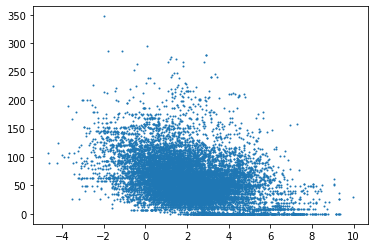

In [21]:
plt.scatter(dataset[VALUE_COLUMN], dataset[TPSA_COLUMN], s = 1)

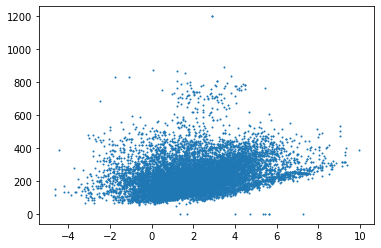

In [22]:
plt.scatter(dataset[VALUE_COLUMN], dataset[MV_COLUMN], s = 1)